# Dictionaries

In [1]:
import csv

### Warmup 1: Read in the file 'cs220_survey_data.csv' into a lists of lists `csv_data`

In [1]:
# inspired by https://automatetheboringstuff.com/2e/chapter16/
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    
    return example_data

In [2]:
csv_data = process_csv("cs220_survey_data.csv") # TODO: change this

# TODO: compute the length of this list of lists 
len(csv_data)

NameError: name 'csv' is not defined

### Warmup 2: store the first row in a variable called `cs220_header`

In [6]:
cs220_header = csv_data[0] # TODO: change this
cs220_header

['Lecture',
 'Age',
 'Major',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Pizza topping',
 'Pet preference',
 'Runner',
 'Sleep habit',
 'Procrastinator']

### Warmup 3: store the rest of the data in a variable called `cs220_data`

In [7]:
cs220_data = csv_data[1:] # TODO: change this
cs220_data[0]

['LEC001',
 '22',
 'Engineering: Biomedical',
 '53703',
 '43.073051',
 '-89.40123',
 'none (just cheese)',
 'neither',
 'No',
 'no preference',
 'Maybe']

### Warmup 4: show the last 3 rows of data

In [8]:
cs220_data[-3:]

[['LEC001',
  '18',
  'Undecided',
  '53706',
  '44.8341',
  '87.377',
  'basil/spinach',
  'dog',
  'No',
  'no preference',
  'Yes'],
 ['LEC003',
  '19',
  'Engineering: Mechanical',
  '53705',
  '46.589146',
  '-112.039108',
  'none (just cheese)',
  'cat',
  'No',
  'night owl',
  'Yes'],
 ['LEC001',
  '20',
  'Economics',
  '53703',
  '39.631506',
  '118.143239',
  'pineapple',
  'dog',
  'No',
  'night owl',
  'Maybe']]

### Warmup 5: what is the output of `cs220_data[-1:]`

- Be careful with slicing.
- Slicing a string gives a new string
- Slicing a list gives a new list
- Slicing a list of list will always give a new list of list (even if your slice only contains one of the inner lists)

In [9]:
cs220_data[-1:]

[['LEC001',
  '20',
  'Economics',
  '53703',
  '39.631506',
  '118.143239',
  'pineapple',
  'dog',
  'No',
  'night owl',
  'Maybe']]

### Warmup 6: Write a function that counts the frequency of a value in a column

In [10]:
def column_frequency(value, col_name):
    ''' Returns the frequency of value in col_name. '''
    count = 0
    for row in cs220_data:
        if row[cs220_header.index(col_name)].lower() == value.lower():
            count += 1
    return count

In [11]:
# Test your function
column_frequency("pineapple", "Pizza topping")

112

In [12]:
# Try other test cases
column_frequency("macaroni/pasta", "Pizza topping")

34

#### TODO: Discuss: Is there an easy way to count *every* topping's frequency?

## Learning Objectives:

- Use correct dictionary syntax 
     - to create a dictionary using either {} or dict()
     - to lookup, insert, update, and pop key-value pairs
- Use a for loop, the in operator, and common methods when working with dictionaries.
- Write code that uses a dictionary
     - to store frequencies
     - to iterate through all key-value pairs

## Data Structure 
A data structure is a collection of data values, the relationships among them, and the functions or operations that can be applied to the data (source: Wikipedia).

<div>
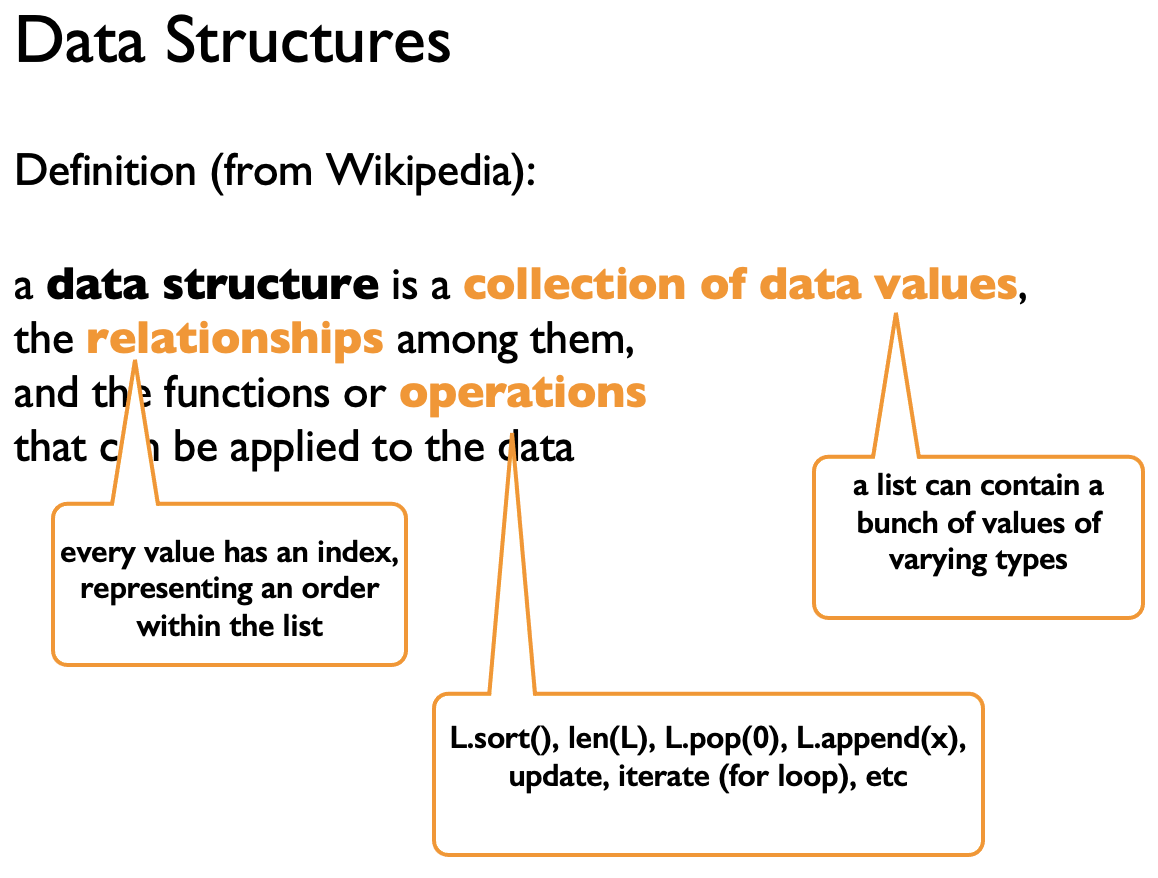
</div>

Python contains built-in Data Structures called Collections

<div>
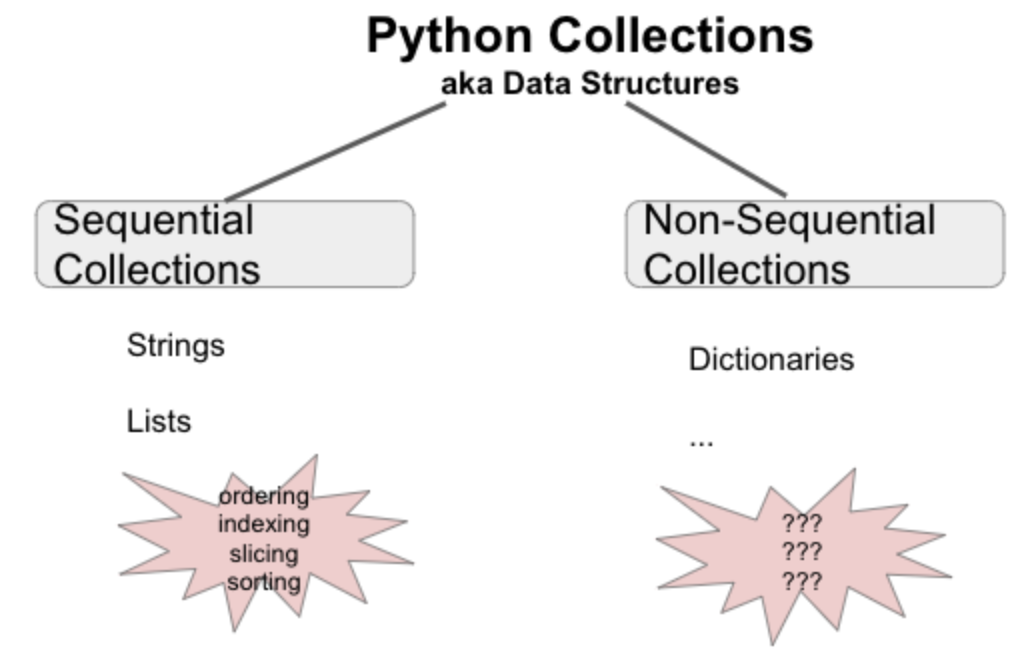
</div>

Today we'll learn how store data and perform various operations in Dictionaries. 

## Mappings

Common data structure approach:
- store many values
- give each value a label
- use labels to lookup values

`list` is an example of a mapping-based data structure

In [11]:
# index 0     1    2    3
nums_list = [300, 200, 400, 100]
nums_list[2] # lookup using index label

400

Labels in a list are inflexible. They can only be consecutive `int`s starting at label 0.

### Dictionary

A dictionary (`dict`) is like a `list`, but more general. In a list, the indices have to be integers; but a dictionary they can be any **immutable** type. Just like lists, values can be anything.

You can think of a dictionary as a mapping between a set of indices (which are called keys) and a set of values. Each key maps to a value. The association of a key and a value is called a key-value pair or sometimes an item. 

(from Think Python, Chapter 11)

In [12]:
# empty dictionary
some_dict = {}       # we use curly braces to create a dictionary
# We'll shortly discuss about dict versus set

# empty dictionary
some_other_dict = dict()

Just like a `list`, `dict` key-value pairs are separated by a `,`.

The `key` and the `value` are separated by a `:`. That is `key:value`.

In [5]:
# TODO: let's define nums_dict

nums_list = [300, 200, 400, 100]
nums_dict = {
    "first": 300,
    "second": 200,
    "third": 400,
    "fourth": 100,
}

nums_dict

{'first': 300, 'second': 200, 'third': 400, 'fourth': 100}

In [9]:
# a dictionary that stores prices of bakery items
# Notice that a dict can span over more than one line, indentation doesn't matter

price_dict = { 'broccoli': 3.95, 
         'spinach': 1.50, 
         'donut': 1.25,     'muffin': 2.25, "ice cream": 3.99,
    'brownie': 3.15, 
         'cookie': 0.79,  'milk': 1.65, 'loaf': 5.99,
        'cauliflower': 3.99}  # feel free to add some of your own here
price_dict["broccoli"]

3.95

#### Dictionaries maintain insertion based ordering in recent versions of Python (3.7 and above versions).

- Go back to the previous cell and add 'ice cream': 3.99 key-value pair before 'brownie': 3.15. Re-run the cell to see how the `dict` definition changes with respect to insertion order.

### Dictionary lookups

- same syntax as `list` indexing
- `some_dict[key]`

### Lookup price of 'brownie', 'cookie', and 'ice cream'.

In [15]:
print(price_dict["brownie"])
print(price_dict["cookie"])
print(price_dict["ice cream"])

3.15
0.79
3.99


### Lookup price of 'sugar'.

In [16]:
# print(price_dict['sugar']) # KeyError
# doesn't work

### Can you perform lookup using values? Answer is no, the mapping is one-way, that is key to value and not vice versa.

In [17]:
# print(price_dict[0.79]) # KeyError
# doesn't work

<div>
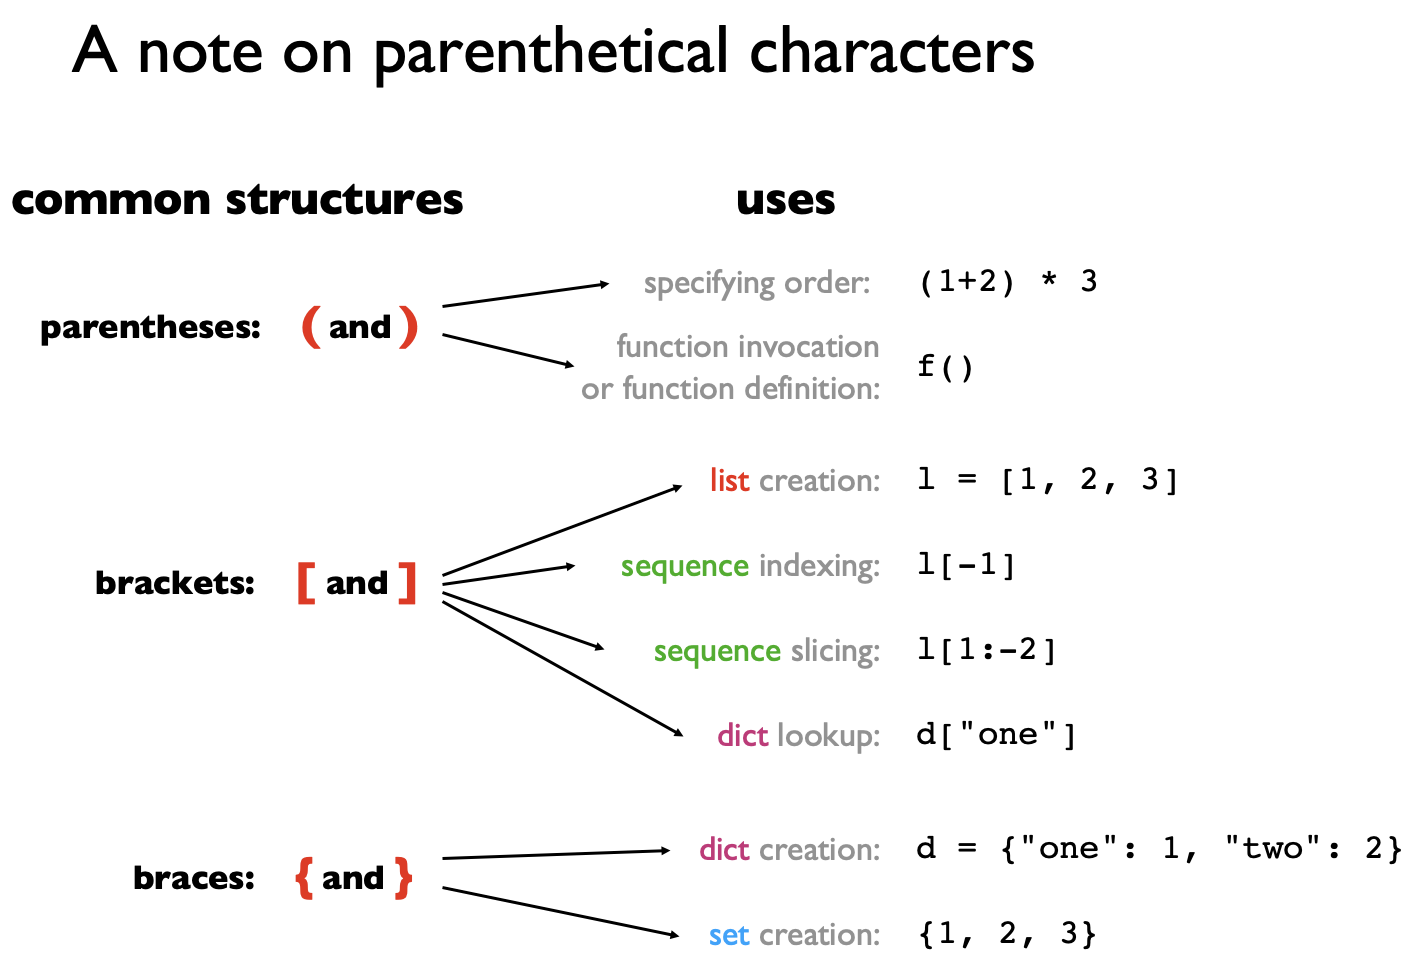
</div>

<div>
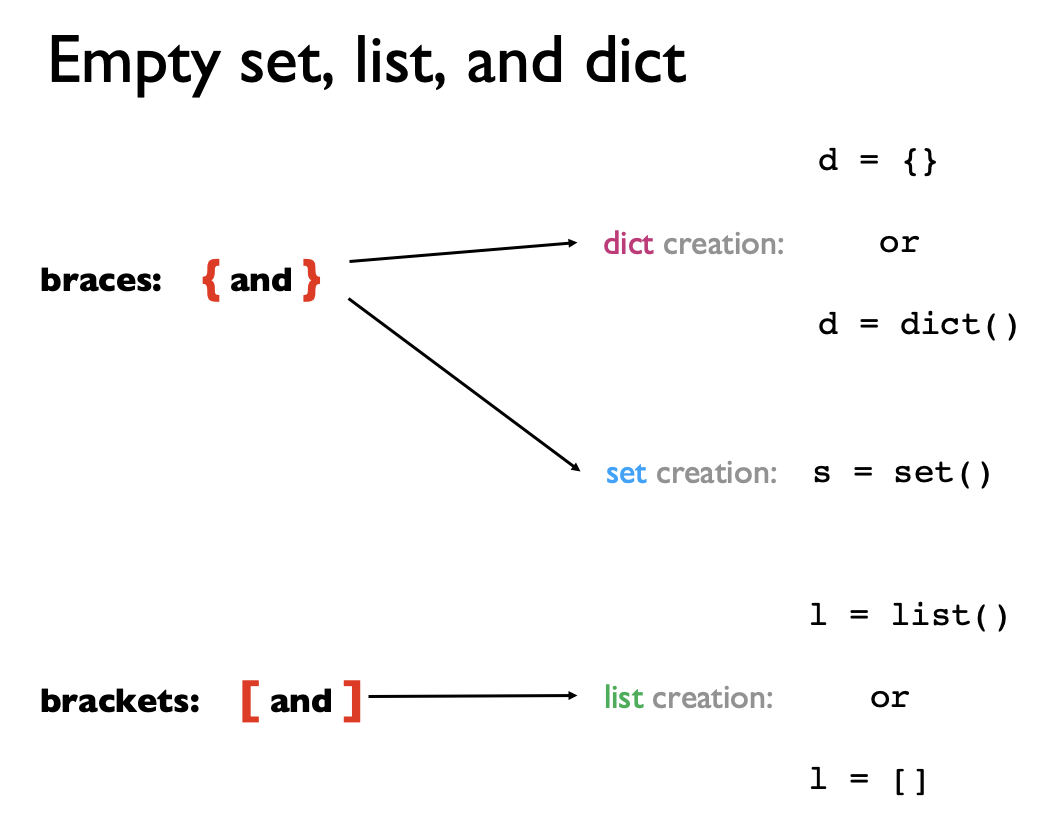
</div>

### Dictionaries are Mutable

- update existing key's value
- insert a new key-value pair
- pop method to delete a key-value pair

In [18]:
# TODO: change price of 'cauliflower' to 2.99
price_dict['cauliflower'] = 2.99
price_dict

{'broccoli': 3.95,
 'spinach': 1.5,
 'donut': 1.25,
 'muffin': 2.25,
 'ice cream': 3.99,
 'brownie': 3.15,
 'cookie': 0.79,
 'milk': 1.65,
 'loaf': 5.99,
 'cauliflower': 2.99}

In [19]:
# TODO: insert new key-value pair 'carrot' mapping to 1.99
price_dict["carrot"] = 1.99
price_dict

{'broccoli': 3.95,
 'spinach': 1.5,
 'donut': 1.25,
 'muffin': 2.25,
 'ice cream': 3.99,
 'brownie': 3.15,
 'cookie': 0.79,
 'milk': 1.65,
 'loaf': 5.99,
 'cauliflower': 2.99,
 'carrot': 1.99}

In [20]:
nums_list = [10, 20, 30]
# nums_list[3] = 40 # Recall that this doesn't work on a list due to IndexError

# TODO: comment out line 2 and use proper syntax to add item 40 to nums_list
nums_list.append(40)
nums_list

[10, 20, 30, 40]

In [21]:
# use pop to delete the 'spinach' key-value pair
price_dict.pop("spinach")

# Alternate
del(price_dict['donut'])

# try deleting someting that is not there
price_dict.pop('pizza') # KeyError

KeyError: 'pizza'

### `in` operator enables us to check whether a key exists in the dictionary

In [22]:
# TODO: fix the above example with a conditional
if "pizza" in price_dict:
    price_dict.pop('pizza')
else:
    print("Oops couldn't find it!")

Oops couldn't find it!


### `len` built-in function returns the number of key-value pairs in a dictionary

In [23]:
# TODO: print length of price_dict
len(price_dict)

9

### `for` loop enables us to iterate over keys in a dictionary

In [24]:
# TODO: iterate over price_dict and print each key-value pair in its own line

for key in price_dict:
    print(key, price_dict[key])

broccoli 3.95
muffin 2.25
ice cream 3.99
brownie 3.15
cookie 0.79
milk 1.65
loaf 5.99
cauliflower 2.99
carrot 1.99


### `keys` method

- retrieves keys of a dictionary
- can be converted into a list

In [8]:
# # get all keys and convert to a list
# print(price_dict.keys())
d = {
    "j": 1,
    "d" : 2,
}

print(d.keys())

dict_keys(['j', 'd'])


### `values` method

- retrieves values of a dictionary
- can be converted into a list

In [26]:
# get all values and convert to a list
print(price_dict.values())

dict_values([3.95, 2.25, 3.99, 3.15, 0.79, 1.65, 5.99, 2.99, 1.99])


In [27]:
# use 'in' price_dict, price_dict.keys(), price_dict.values()

print('donut' in price_dict)          # default is to check the keys
print(9.95 in price_dict)             # default is NOT values
print('apple' in price_dict.keys())   # can call out the keys
print(3.95 in price_dict.values())    # can check the values

False
False
False
True


### Example 1: find total cost of shopping order

In [28]:
order = ['pie', 'donut', 'milk', 'cookie', 'tofu'] # add more items to the order
print(order)

total_cost = 0
for item in order:
    # TODO: check if item is a key in price_dict
    #            if yes, retrieve the value and add it to total_cost
    #            if not, display "Couldn't find <item> in price list!"
    if item in price_dict:
        total_cost += price_dict[item]
    else:
        print("Couldn't find {} in price list!".format(item))
        
# find the total of the items in the order
print ("Your total cost is ${:.2f}".format(total_cost))

['pie', 'donut', 'milk', 'cookie', 'tofu']
Couldn't find pie in price list!
Couldn't find donut in price list!
Couldn't find tofu in price list!
Your total cost is $2.44


### Example 2a: find the letter that occurred the most in a sentence

In [29]:
# start with an empty dictionary
letter_freq = {} # KEY: unique letter; VALUE: count of unique letter

sentence = "Meet me at the bike racks after school at 3:30 today."

for letter in sentence:
    # TODO: check if letter is a key in letter_freq
    #           if yes, increment letter frequency by 1
    #           if no, insert a new key-value pair
    if letter in letter_freq:
        letter_freq[letter] += 1
    else:
        letter_freq[letter] = 1

print(letter_freq)

{'M': 1, 'e': 6, 't': 6, ' ': 10, 'm': 1, 'a': 5, 'h': 2, 'b': 1, 'i': 1, 'k': 2, 'r': 2, 'c': 2, 's': 2, 'f': 1, 'o': 3, 'l': 1, '3': 2, ':': 1, '0': 1, 'd': 1, 'y': 1, '.': 1}


### Example 2b: find the letter that occurred the most

In [30]:
most_used_key = None  
max_value = None

for letter in letter_freq:
    # TODO: you already know how to use a for loop to compute max
    if max_value == None or letter_freq[letter] > max_value:
        max_value = letter_freq[letter]
        most_used_key = letter

print("The character \"{}\" appeared {} times.".format(str(most_used_key), max_value))

The character " " appeared 10 times.


In [31]:
# TODO: discuss: why not use range-based for loop?

for i in range(len(letter_freq)):
    print(i) # can you do anything with i in this letter_freq dictionary?

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


### Example 3a: Survey dataset: count every primary major's frequency

In [32]:
major_freq = {} # KEY: unique major; VALUE: count of unique major

# TODO: iterate over each student's data from cs220_data
# TODO: extract "Primary major" column's value 
# TODO: check if current student's major already a key in major_freq
#            - if yes, increase the corresponding value by 1
#            - if no, insert a new key-value pair

for row in cs220_data:
    major = row[cs220_header.index("Major")]
    if major in major_freq:
        major_freq[major] += 1
    else:
        major_freq[major] = 1
    
major_freq

{'Engineering: Biomedical': 45,
 'Undecided': 23,
 'Engineering: Industrial': 58,
 'Engineering: Other|Engineering: Computer': 1,
 'Data Science': 164,
 'Mathematics/AMEP': 34,
 'Engineering: Other': 13,
 'Economics': 53,
 'Psychology': 7,
 'Science: Biology/Life': 37,
 'Engineering: Mechanical': 198,
 'Economics (Mathematical Emphasis)': 7,
 'Computer Science': 115,
 'Science: Other|Political Science': 1,
 'Business: Other': 11,
 'Business: Other|Real Estate': 2,
 'Engineering: Other|Engineering Physics: Scientific Computing': 1,
 'Business: Finance': 30,
 'Business: Information Systems': 24,
 'Statistics': 26,
 'Business: Actuarial': 22,
 'Science: Physics': 8,
 'Science: Other': 9,
 'Business: Other|Accounting': 2,
 'Business: Other|business analytics': 1,
 'Science: Other|animal sciences': 1,
 'Mathematics': 2,
 'Health Promotion and Health Equity': 2,
 'Art': 1,
 'Mathematics, Data Science': 1,
 'Science: Other|Science: Genetics and Genomics': 1,
 'Statistics (actuarial route)': 1

### Example 3b: find primary major with highest frequency

In [33]:
# Example 3b: use the algorithm from 2b to find the major with the highest frequency

most_used_key = None  
max_value = None

for major in major_freq:
    # TODO: you already know how to use a for loop to compute max
    if max_value == None or major_freq[major] > max_value:
        max_value = major_freq[major]
        most_used_key = major

print("The major \"{}\" appeared {} times.".format(str(most_used_key), max_value))

The major "Engineering: Mechanical" appeared 198 times.


### After Lecture Practice

Organize your data structure notes ...

<div>
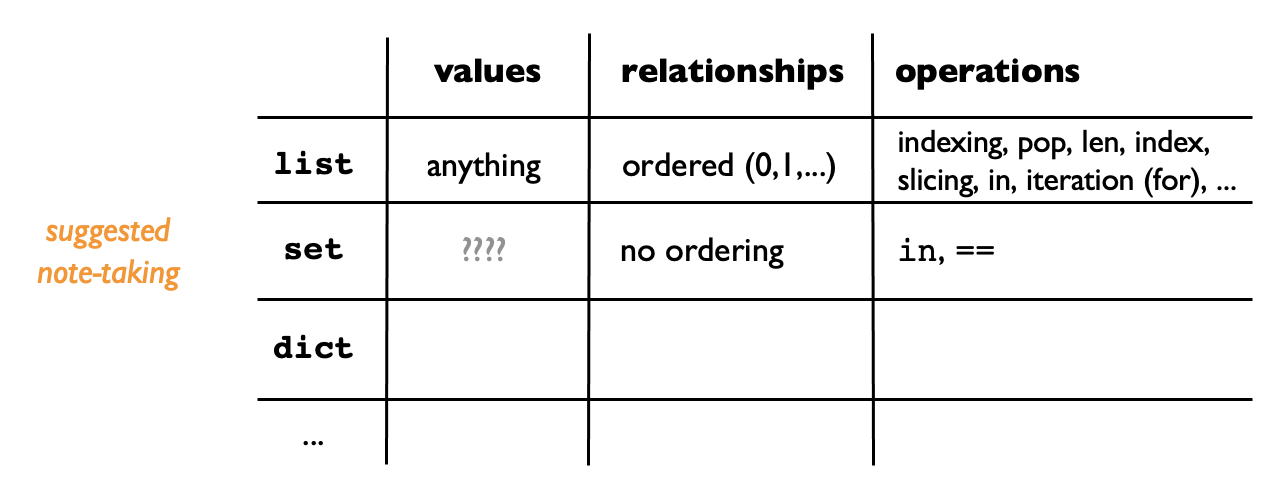
</div>

#### Review slide deck

#### Review this summary of common dictionary methods:
https://www.w3schools.com/python/python_ref_dictionary.asp